In [1]:
# Importing all the necessary packages

    # for data extraction 
import requests
import json
    # for data manupulations
import pandas as pd
from pandas import json_normalize
    # for ploting
import matplotlib.pyplot as plt
    # for removing warnings
import warnings 
warnings.filterwarnings('ignore')

## Data Extraction

In [2]:
# Function to extract data from The Graph using api

def extract(skip_val):
    url = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2"
    query = """query swaps{
      swaps(first: 1000,skip:"""+str(skip_val)+""",orderBy: timestamp, orderDirection: desc, where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}) {
        pair{
        id
        }
        timestamp
        amount0In
        amount1In
        amount0Out
        amount1Out
        pair {
          token0 {
            symbol
            totalLiquidity
          }
          token1 {
            symbol
            totalLiquidity
          }

        }
        amountUSD

      }
    }

    """
    
    read = requests.post(url, json={'query':query})
    json_data = json.loads(read.text)
    
    # Normalising the json data, such that it can be converted into a pandas data frame.
    json_data = json_data['data']
    json_data = json_data['swaps']
    df = json_normalize(json_data)
    return df

In [3]:
# Extracting the first 1000 records
df = extract(0)

# Extracting another 4000 records, a total of 5000 records
for i in range(1000,5000,1000):
    df = df.append(extract(i))

In [4]:
df.head(5)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity
0,141.72831773823662643,0,0,1.234145917158153744,2306.162811793481044977215513136704,1624398941,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799
1,864.477993549045483419,0,0,7.530995866209087575,14082.11317428541420217443585749201,1624398831,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799
2,8.461965003386849505,0,0,0.073745052833925004,137.8492325277273333378399500984958,1624398786,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799
3,50.095777779336121077,0,0,0.436589983472366927,816.0362462083772206738932746828699,1624398637,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799
4,1179.63822333850042143,0,0,10.286133221639822362,19347.86204610714802749228661295065,1624397967,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799


## Data Manipulation

In [5]:
# Reseting the index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.tail(5)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity
4995,0,638.620834279819681222,6.190732174384223771,0,16072.30305499727075528085521700965,1623288027,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751206.705205364243255883
4996,0,1134.104421949828459829,10.985581787515176383,0,28507.71078696094149106034805155706,1623288020,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751206.705205364243255883
4997,0,574.404713405143734569,5.559956367382300959,0,14414.42120229978735110804864006346,1623287809,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751206.705205364243255883
4998,0.471484572498171315,0,0,0.004535288938433771,11.75805594035601583372723404592405,1623287807,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751206.705205364243255883
4999,0,555.440952014030176471,5.373806795999199492,0,13931.96781019220947484321410381511,1623287797,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751206.705205364243255883


In [6]:
# Converting timestamp into Date Time format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [7]:
# Creating a column for side(Buy/Sell)
    # amount0In and amount0Out -> represents UNI
    # amount1In and amount1Out -> represents WETH
        # if amount0In is 0 and amount0Out has some value, it means that UNI is sent out of the wallet, i.e. Sell
        # if amount0Out is 0 and amount0In has some value. it means that UNI is recived to the wallet, i.e. Buy  

df['side'] = ["Sell" if float(x)==0 else "Buy" for x in df['amount0In']]

In [8]:
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side
0,141.72831773823662643,0,0,1.234145917158153744,2306.162811793481044977215513136704,2021-06-22 21:55:41,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799,Buy
1,864.477993549045483419,0,0,7.530995866209087575,14082.11317428541420217443585749201,2021-06-22 21:53:51,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799,Buy


In [9]:
# converting
    # amount0In
    # amount1In
    # pair.token0.symbol
        # into "Base curency quantity traded" format

# Eg
    # amount0In/amount0Out UNI
    # 115.82195 UNI    -> rounded off to 5 decimals  -> it is not appropriate to round off a digital currency
    
b_c = df['amount0In']+df['amount0Out']
b_c = [round(float(i),5) for i in b_c]
b_c = [(str(i)+" "+str(df['pair.token0.symbol'][0])) for i in b_c]
df["baseCurrency"] = b_c

q_o = df['amount1In']+df['amount1Out']
q_o = [round(float(i),5) for i in q_o]
q_o = [(str(i)+" "+str(df['pair.token1.symbol'][0])) for i in q_o]
df["quoteCurrency"] = q_o

df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency
0,141.72831773823662643,0,0,1.234145917158153744,2306.162811793481044977215513136704,2021-06-22 21:55:41,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799,Buy,141.72832 UNI,1.23415 WETH
1,864.477993549045483419,0,0,7.530995866209087575,14082.11317428541420217443585749201,2021-06-22 21:53:51,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2352071.497271541057963843,WETH,751221.915590061593077799,Buy,864.47799 UNI,7.531 WETH


In [10]:
# Creating a new column for total liquidity
df['pair.token1.totalLiquidity'] = pd.to_numeric(df['pair.token1.totalLiquidity'])
df['pair.token0.totalLiquidity'] = pd.to_numeric(df['pair.token0.totalLiquidity'])
df['totalLiquidity'] = round(df['pair.token1.totalLiquidity']+df['pair.token0.totalLiquidity'],5)
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency,totalLiquidity
0,141.72831773823662643,0,0,1.234145917158153744,2306.162811793481044977215513136704,2021-06-22 21:55:41,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.352071e+06,WETH,751221.91559,Buy,141.72832 UNI,1.23415 WETH,3.103293e+06
1,864.477993549045483419,0,0,7.530995866209087575,14082.11317428541420217443585749201,2021-06-22 21:53:51,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.352071e+06,WETH,751221.91559,Buy,864.47799 UNI,7.531 WETH,3.103293e+06


In [11]:
# Rounding off USD to 5 decimals (Not to be done for real time works)
df['amountUSD'] =round (pd.to_numeric(df['amountUSD']),5)
df.head(2)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,timestamp,pair.id,pair.token0.symbol,pair.token0.totalLiquidity,pair.token1.symbol,pair.token1.totalLiquidity,side,baseCurrency,quoteCurrency,totalLiquidity
0,141.72831773823662643,0,0,1.234145917158153744,2306.16281,2021-06-22 21:55:41,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.352071e+06,WETH,751221.91559,Buy,141.72832 UNI,1.23415 WETH,3.103293e+06
1,864.477993549045483419,0,0,7.530995866209087575,14082.11317,2021-06-22 21:53:51,0xd3d2e2692501a5c9ca623199d38826e513033a17,UNI,2.352071e+06,WETH,751221.91559,Buy,864.47799 UNI,7.531 WETH,3.103293e+06


In [12]:
# Removing excess columns
df.drop(['amount0In','amount0Out','amount1In','amount1Out','pair.token0.symbol','pair.token1.symbol','pair.token1.totalLiquidity','pair.token0.totalLiquidity'],axis=1,inplace=True)
df.head(2)

,amountUSD,timestamp,pair.id,side,baseCurrency,quoteCurrency,totalLiquidity
0,2306.16281,2021-06-22 21:55:41,0xd3d2e2692501a5c9ca623199d38826e513033a17,Buy,141.72832 UNI,1.23415 WETH,3.103293e+06
1,14082.11317,2021-06-22 21:53:51,0xd3d2e2692501a5c9ca623199d38826e513033a17,Buy,864.47799 UNI,7.531 WETH,3.103293e+06


In [13]:
# Re-naming columns
df.rename({'amountUSD': 'volumeUSD', 'pair.id': 'poolId'}, axis=1, inplace=True)
df.head(2)

,volumeUSD,timestamp,poolId,side,baseCurrency,quoteCurrency,totalLiquidity
0,2306.16281,2021-06-22 21:55:41,0xd3d2e2692501a5c9ca623199d38826e513033a17,Buy,141.72832 UNI,1.23415 WETH,3.103293e+06
1,14082.11317,2021-06-22 21:53:51,0xd3d2e2692501a5c9ca623199d38826e513033a17,Buy,864.47799 UNI,7.531 WETH,3.103293e+06


In [14]:
# Re-arranging the columns
df = df[['timestamp', 'side', 'baseCurrency', 'quoteCurrency', 'volumeUSD','totalLiquidity','poolId']]
df.head()

,timestamp,side,baseCurrency,quoteCurrency,volumeUSD,totalLiquidity,poolId
0,2021-06-22 21:55:41,Buy,141.72832 UNI,1.23415 WETH,2306.16281,3.103293e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
1,2021-06-22 21:53:51,Buy,864.47799 UNI,7.531 WETH,14082.11317,3.103293e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
2,2021-06-22 21:53:06,Buy,8.46197 UNI,0.07375 WETH,137.84923,3.103293e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
3,2021-06-22 21:50:37,Buy,50.09578 UNI,0.43659 WETH,816.03625,3.103293e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17
4,2021-06-22 21:39:27,Buy,1179.63822 UNI,10.28613 WETH,19347.86205,3.103293e+06,0xd3d2e2692501a5c9ca623199d38826e513033a17


## Initial Analysis

In [15]:
# Checking the range of dates
start_date = df.iloc[0]['timestamp']
end_date = df.iloc[-1]['timestamp']
print("The Data ranges between the date "+str(end_date)+" to "+str(start_date))

The Data ranges between the date 2021-06-10 01:16:37 to 2021-06-22 21:55:41


In [16]:
# Number of Buy and Sell transactions in the given period
df['side'].value_counts()

Buy     2916
Sell    2084
Name: side, dtype: int64

Text(0.5,1,'Number of transactions done on each day')

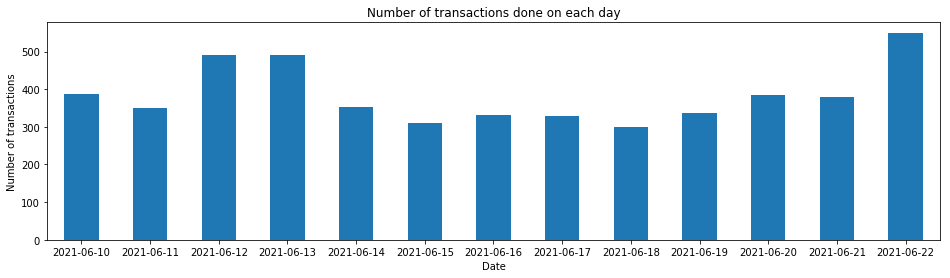

In [17]:
fig, axs = plt.subplots(figsize=(16, 4))

df.groupby(df["timestamp"].dt.date)["timestamp"].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Date")
plt.ylabel("Number of transactions")
plt.title("Number of transactions done on each day")

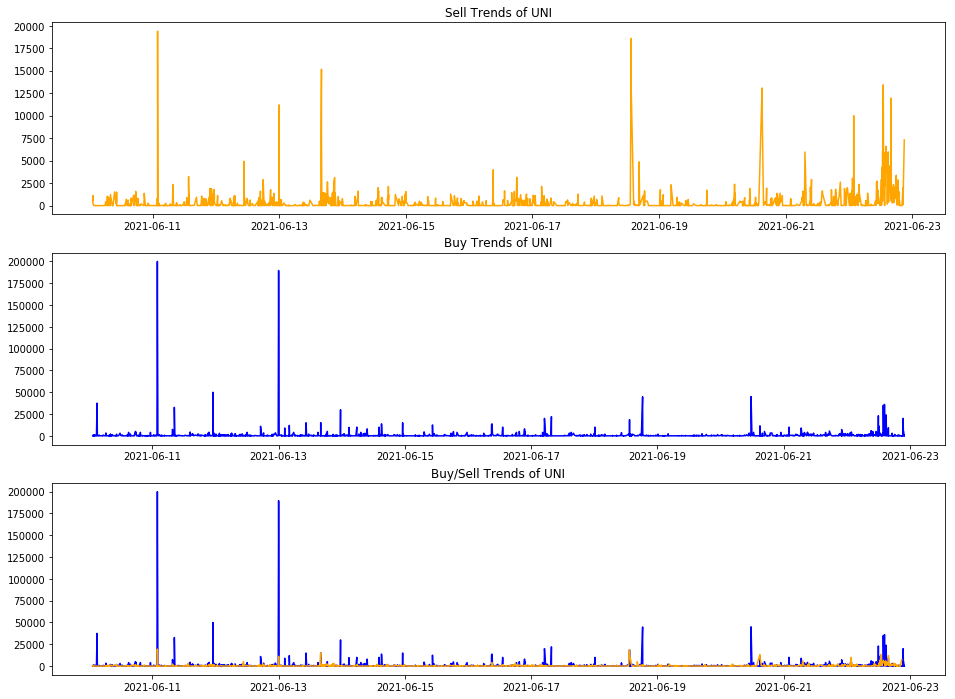

In [18]:
# since we converted base curency and quote curency to strings, for adding the type of token next to its value.
# we can create a different dataframe, for further analysis

temp = [i for i in df['baseCurrency']]
b_c=[]
for i in temp:
    b_c.append(float(i.split(" ")[0]))
    
UNI_ = df[['timestamp','side']]
UNI_['UNI_QTY'] = b_c
UNI_.head(5)

uni_sell = UNI_[UNI_['side']=='Sell']
uni_buy = UNI_[UNI_['side']=='Buy']


fig, axs = plt.subplots(figsize=(16, 12))
plt.subplot(311)
plt.plot(uni_sell['timestamp'], uni_sell['UNI_QTY'],color='orange') 
plt.title("Sell Trends of UNI")
plt.subplot(312)
plt.plot(uni_buy['timestamp'], uni_buy['UNI_QTY'],color='blue')
plt.title("Buy Trends of UNI")
plt.subplot(313)
plt.plot(uni_buy['timestamp'], uni_buy['UNI_QTY'],color='blue')
plt.plot(uni_sell['timestamp'], uni_sell['UNI_QTY'],color='orange') 
plt.title("Buy/Sell Trends of UNI")
plt.show() 


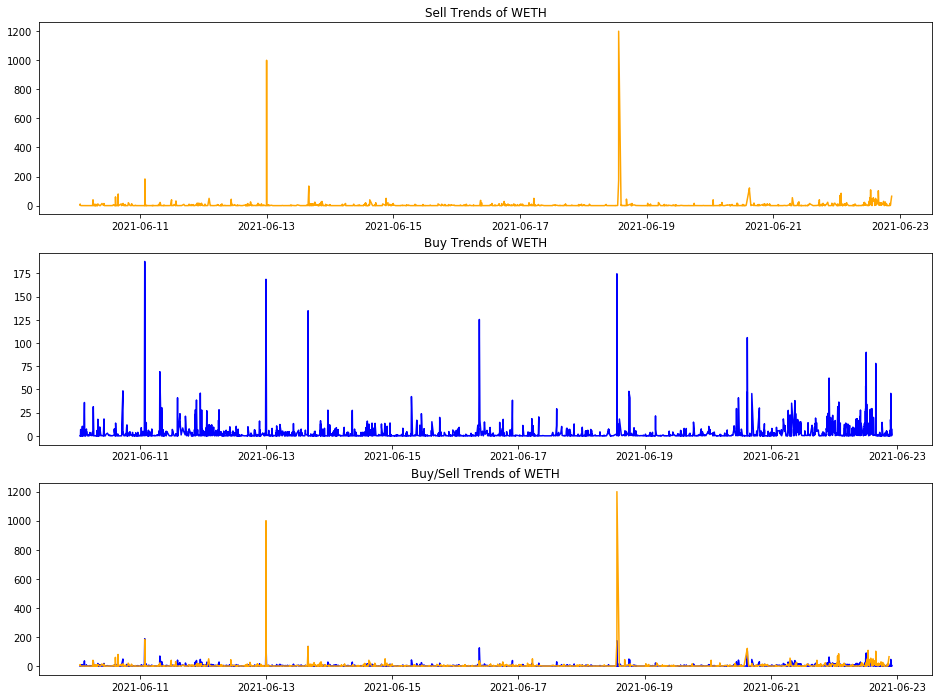

In [19]:
# since we converted base curency and quote curency to strings, for adding the type of token next to its value.
# we can create a different dataframe, for further analysis

temp = [i for i in df['quoteCurrency']]
b_c=[]
for i in temp:
    b_c.append(float(i.split(" ")[0]))
    
WETH_ = df[['timestamp','side']]
WETH_['UNI_QTY'] = b_c
WETH_.head(5)

weth_sell = WETH_[WETH_['side']=='Sell']
weth_buy = WETH_[WETH_['side']=='Buy']


fig, axs = plt.subplots(figsize=(16, 12))
plt.subplot(311)
plt.plot(uni_sell['timestamp'], weth_sell['UNI_QTY'],color='orange') 
plt.title("Sell Trends of WETH")
plt.subplot(312)
plt.plot(uni_buy['timestamp'], weth_buy['UNI_QTY'],color='blue')
plt.title("Buy Trends of WETH")
plt.subplot(313)
plt.plot(uni_buy['timestamp'], weth_buy['UNI_QTY'],color='blue')
plt.plot(uni_sell['timestamp'], weth_sell['UNI_QTY'],color='orange') 
plt.title("Buy/Sell Trends of WETH")
plt.show() 